# Transfinite Interpolation
See: https://en.wikipedia.org/wiki/Transfinite_interpolation

In [1]:
from IPython.display import SVG, display

In [2]:
import numpy as np
import matplotlib.pylab as plt
import scipy.interpolate as si

In [3]:
%matplotlib inline

In [4]:
url = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/0f6509b5bb089778aa935a5c44aec9038b9d139b'

def show_svg(url):
    display(SVG(url=url))

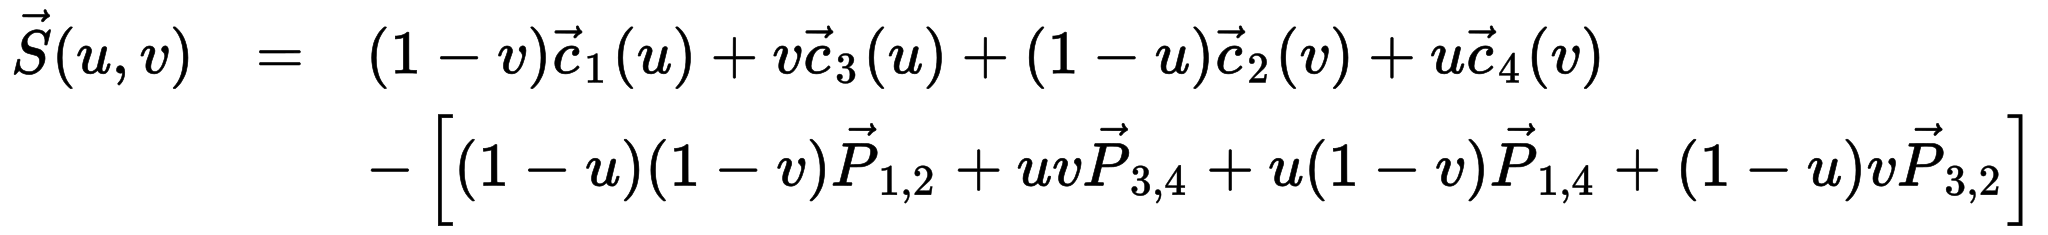

In [5]:
show_svg(url)

In [6]:
# boundary curves in xi direction
lower = [(0.0, 0.0), (0.1, 0.0),  (0.2, 0.0), (0.3, 0.0), (0.4, 0.0), (0.45, 0.0), (0.5, 0.0)]
upper = [(0.2, 0.5), (0.3, 0.5),  (0.4, 0.5), (0.5, 0.5), (0.6, 0.5), (0.64, 0.5), (0.7, 0.5)]

# boundary curves in eta direction
left = [(0.0, 0.0), (0.1, 0.2),  (0.18, 0.25), (0.18, 0.38), (0.19, 0.45), (0.2, 0.5)]
right = [(0.5, 0.0), (0.5, 0.1),  (0.55, 0.18), (0.6, 0.3), (0.65, 0.4), (0.7, 0.5)]

In [7]:
def transfinite(lower, upper, left, right):
    """Make a transfinite interpolation.

    http://en.wikipedia.org/wiki/Transfinite_interpolation

    Args:
        lower (list): List of (x, y) tuples describing the lower bound
        upper (list): List of (x, y) tuples describing the upper bound
        left (list): List of (x, y) tuples describing the left bound
        right (list): List of (x, y) tuples describing the right bound

    Example input for the lower boundary:
        lower = [(0.0, 0.0), (0.1, 0.3),  (0.5, 0.4)]
    """

    lower = np.array(lower)
    upper = np.array(upper)
    left = np.array(left)
    right = np.array(right)

    # interpolate B-spline through data points
    # here, a linear interpolant is derived "k=1"
    # splprep returns:
    # tck ... tuple (t,c,k) containing the vector of knots,
    #         the B-spline coefficients, and the degree of the spline.
    #   u ... array of the parameters for each given point (knot)
    tck_left, u_left = si.splprep(left.T, s=0, k=1)
    tck_right, u_right = si.splprep(right.T, s=0, k=1)
    tck_lower, u_lower = si.splprep(lower.T, s=0, k=1)
    tck_upper, u_upper = si.splprep(upper.T, s=0, k=1)

    # evaluate function at any parameter "0<=t<=1"
    def eta_left(t):
        return np.array(si.splev(t, tck_left, der=0))

    def eta_right(t):
        return np.array(si.splev(t, tck_right, der=0))

    def xi_bottom(t):
        return np.array(si.splev(t, tck_lower, der=0))

    def xi_top(t):
        return np.array(si.splev(t, tck_upper, der=0))

    nodes = np.zeros((len(u_left) * len(u_lower), 2))

    # corner points
    c1 = xi_bottom(0.0)
    c2 = xi_top(0.0)
    c3 = xi_bottom(1.0)
    c4 = xi_top(1.0)

    for i, xi in enumerate(u_lower):
        xi_t = u_upper[i]
        for j, eta in enumerate(u_left):
            eta_r = u_right[j]

            node = i * len(u_left) + j

            # formula for the transinite interpolation
            point = (1.0 - xi) * eta_left(eta) + xi * eta_right(eta_r) + \
                (1.0 - eta) * xi_bottom(xi) + eta * xi_top(xi_t) - \
                ((1.0 - xi) * (1.0 - eta) * c1 + (1.0 - xi) * eta * c2 +
                 xi * (1.0 - eta) * c3 + xi * eta * c4)

            nodes[node, 0] = point[0]
            nodes[node, 1] = point[1]

    return nodes

In [8]:
nodes = transfinite(lower, upper, left, right)

In [9]:
lower = np.array(lower)
upper = np.array(upper)
left = np.array(left)
right = np.array(right)

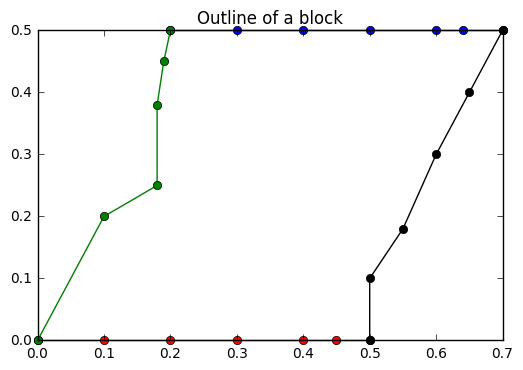

In [13]:
plt.plot(lower[:, 0], lower[:, 1], 'r', marker='o', clip_on=False)
plt.plot(upper[:, 0], upper[:, 1], 'b', marker='o', clip_on=False)
plt.plot(left[:, 0], left[:, 1], 'g', marker='o', clip_on=False)
plt.plot(right[:, 0], right[:, 1], 'k', marker='o', clip_on=False)
plt.title('Outline of a block')

In [14]:
vlines = list()
vline = list()
i = 0
for node in nodes:
    i += 1
    vline.append(node)
    if i%6 == 0:
        vlines.append(vline)
        vline = list()
        
ulines = list()
uline = list()
for i in range(len(vlines[0])):
    for vline in vlines:
        uline.append(vline[i])
    ulines.append(uline)
    uline = list()

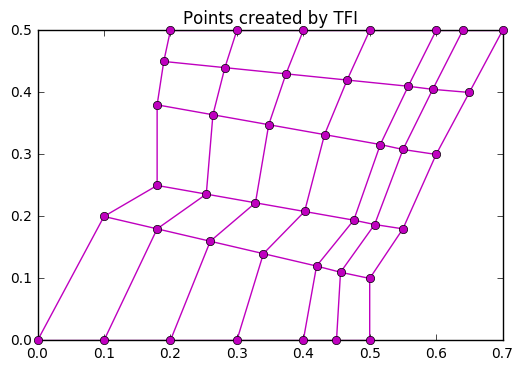

In [15]:
for vline in vlines:
    plt.plot(np.array(vline)[:, 0], np.array(vline)[:, 1], 'm')

for uline in ulines:
    plt.plot(np.array(uline)[:, 0], np.array(uline)[:, 1], 'm')

plt.plot(nodes[:, 0], nodes[:, 1], 'mo', zorder=10, clip_on=False)
plt.title('Points created by TFI')